In [6]:
#2-B - Detect Outliers

#Detect using BOX PLOT

import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Yash\OneDrive\Desktop\DSBDA_Lab\Problem_Statement_2\demo1.csv")

In [3]:
df

,math score,reading score,writing score,placement score,placement offer count,club join year
0,80,68,70,89,3,2019
1,71,61,85,91,3,2019
2,79,16,87,77,2,2018
3,61,77,74,76,2,2020
4,78,71,67,90,3,2019
5,73,68,90,80,2,2019
6,77,62,70,35,2,2020
7,74,45,80,12,1,2019
8,76,60,79,77,2,2020
9,75,65,85,87,3,2018


In [7]:
col = ['math score', 'reading score' , 'writing score','placement score']

<Axes: >

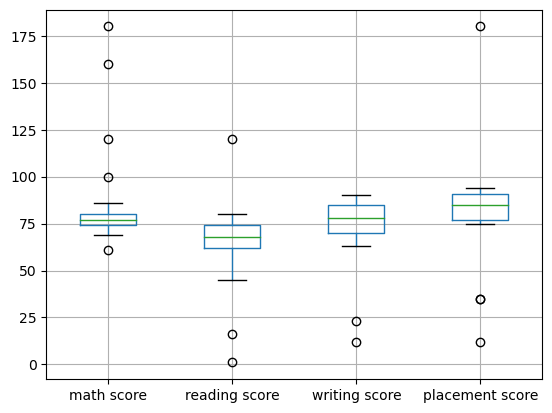

In [8]:
df.boxplot(col)

In [9]:
print(np.where(df['math score']>90))

(array([10, 21, 25, 28], dtype=int64),)


In [10]:
print(np.where(df['reading score']<25))

(array([ 2, 14], dtype=int64),)


In [11]:
print(np.where(df['writing score']<30))

(array([10, 17], dtype=int64),)


In [12]:
#Detect using Z-SCORE
import numpy as np
from scipy import stats

In [15]:
df1=pd.read_csv(r"C:\Users\Yash\OneDrive\Desktop\DSBDA_Lab\Problem_Statement_2\demo1.csv")

In [16]:
z = np.abs(stats.zscore(df1['math score']))

In [17]:
print(z)

0     0.175646
1     0.528288
2     0.214828
3     0.920112
4     0.254010
5     0.449923
6     0.293193
7     0.410740
8     0.332375
9     0.371558
10    2.958952
11    0.214828
12    0.175646
13    0.254010
14    0.371558
15    0.254010
16    0.059449
17    0.175646
18    0.371558
19    0.097281
20    0.606653
21    0.608004
22    0.489105
23    0.410740
24    0.371558
25    3.742601
26    0.489105
27    0.528288
28    1.391653
Name: math score, dtype: float64


In [18]:
threshold = 0.18

In [19]:
sample_outliers = np.where(z <threshold)
sample_outliers

(array([ 0, 12, 16, 17, 19], dtype=int64),)

In [20]:
#Detect using IQR

In [21]:
df2=pd.read_csv(r"C:\Users\Yash\OneDrive\Desktop\DSBDA_Lab\Problem_Statement_2\demo1.csv")

In [22]:
sorted_rscore= sorted(df2['reading score'])

In [23]:
sorted_rscore

[1,
 16,
 45,
 60,
 60,
 61,
 62,
 62,
 62,
 65,
 65,
 65,
 67,
 67,
 68,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 77,
 77,
 77,
 78,
 79,
 80,
 120]

In [24]:
q1 = np.percentile(sorted_rscore, 25)
q3 = np.percentile(sorted_rscore, 75)
print(q1,q3)

62.0 74.0


In [25]:
IQR = q3-q1

In [26]:
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print(lwr_bound, upr_bound)

44.0 92.0


In [28]:
r_outliers = []
for i in sorted_rscore:
    if (i<lwr_bound or i>upr_bound):
        r_outliers.append(i)
        
print(r_outliers)

        

[1, 16, 120]


In [29]:
#END